In [107]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam


In [108]:
import os
import cv2
path='D:/dataset for lab programs/Animal/train'
classes= sorted(os.listdir(path))

# Count the number of classes
num_classes = len(classes)

# Print the class names and the total number of classes
print("Class Names: \n", classes)
print("Number of Classes:", num_classes)


Class Names: 
 ['ELEPHANT', 'HORSE', 'LION', 'cat', 'dog']
Number of Classes: 5


In [109]:
path='D:/dataset for lab programs/Animal/train'
cat_pth=os.path.join(path,'cat')
dog_pth=os.path.join(path, 'dog')
lion_pth=os.path.join(path,'LION')
elephant_pth=os.path.join(path,'ELEPHANT')
horse_pth=os.path.join(path,'HORSE')

In [110]:
print("Files in 'cat' folder:", os.listdir(cat_pth))
print("Files in 'dog' folder:", os.listdir(dog_pth))
print("Files in 'lion' folder:", os.listdir(lion_pth))
print("Files in 'elephant' folder:", os.listdir(elephant_pth))
print("Files in 'horse' folder:", os.listdir(horse_pth))


Files in 'cat' folder: ['pixabay_cat_001849.jpg', 'pixabay_cat_001850.jpg', 'pixabay_cat_001851.jpg', 'pixabay_cat_001852.jpg', 'pixabay_cat_001853.jpg', 'pixabay_cat_001854.jpg', 'pixabay_cat_001855.jpg', 'pixabay_cat_001856.jpg', 'pixabay_cat_001857.jpg', 'pixabay_cat_001858.jpg', 'pixabay_cat_001859.jpg', 'pixabay_cat_001861.jpg', 'pixabay_cat_001862.jpg', 'pixabay_cat_001863.jpg', 'pixabay_cat_001864.jpg', 'pixabay_cat_001865.jpg', 'pixabay_cat_001866.jpg', 'pixabay_cat_001867.jpg', 'pixabay_cat_001868.jpg', 'pixabay_cat_001869.jpg', 'pixabay_cat_001870.jpg', 'pixabay_cat_001871.jpg', 'pixabay_cat_001872.jpg', 'pixabay_cat_001873.jpg', 'pixabay_cat_001874.jpg', 'pixabay_cat_001875.jpg', 'pixabay_cat_001876.jpg', 'pixabay_cat_001877.jpg', 'pixabay_cat_001878.jpg', 'pixabay_cat_001879.jpg', 'pixabay_cat_001880.jpg', 'pixabay_cat_001881.jpg', 'pixabay_cat_001882.jpg', 'pixabay_cat_001883.jpg', 'pixabay_cat_001884.jpg', 'pixabay_cat_001885.jpg', 'pixabay_cat_001886.jpg', 'pixabay_cat_0

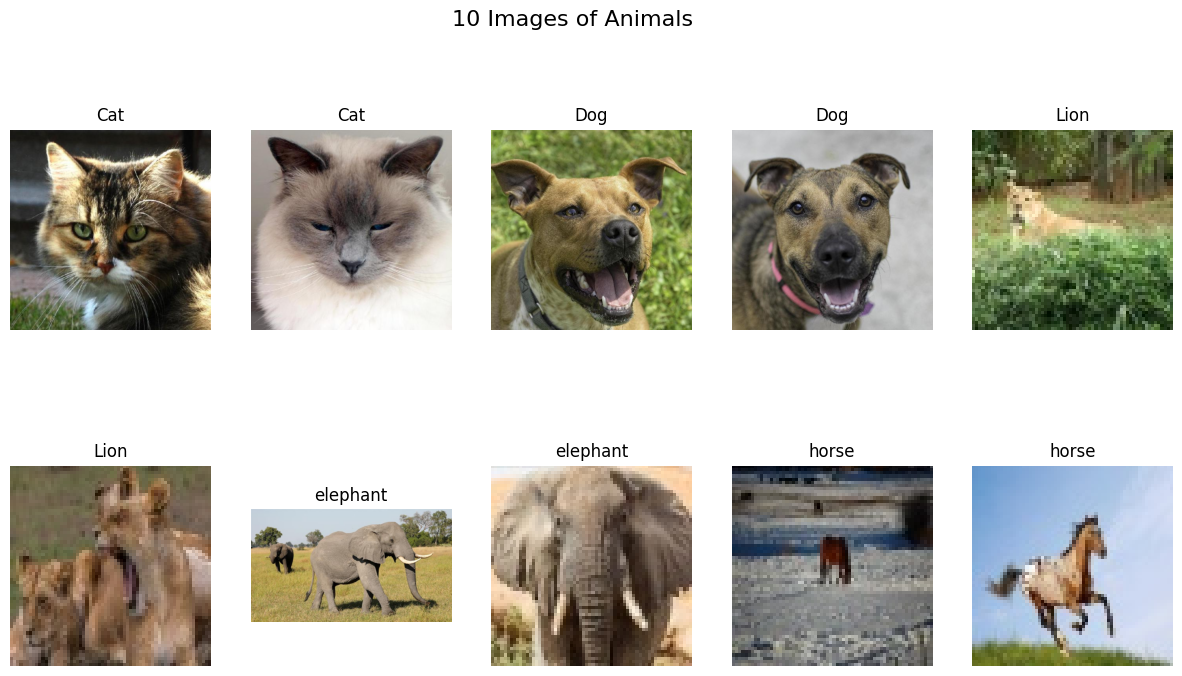

In [111]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the image directories
path = 'D:/dataset for lab programs/Animal/train'
cat_path = os.path.join(path, 'cat')
dog_path = os.path.join(path, 'dog')
lion_path = os.path.join(path, 'lion')
elephant_path = os.path.join(path, 'elephant')
horse_path = os.path.join(path, 'horse')

# Plotting the images in a 2x5 grid
plt.figure(figsize=(15, 8))
plt.suptitle('10 Images of Animals', fontsize=16)

# Plot 2 images for each animal category
for i, (image_path, animal_name) in enumerate([(cat_path, 'Cat'), (dog_path, 'Dog'), (lion_path, 'Lion'), (elephant_path, 'elephant'), (horse_path, 'horse')]):
    for j in range(2):
        plt.subplot(2, 5, i * 2 + j + 1)
        image_file = os.listdir(image_path)[j]
        img = mpimg.imread(os.path.join(image_path, image_file))
        plt.imshow(img)
        plt.title(animal_name)
        plt.axis('off')

plt.show()

In [112]:
image_size = (150, 150)  # Define the desired image size


In [118]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
path='D:/dataset for lab programs/Animal/train'
cat_pth=os.path.join(path,'cat')
dog_pth=os.path.join(path, 'dog')
lion_pth=os.path.join(path,'lion')
wolf_pth=os.path.join(path,'wolf')
leopard_pth=os.path.join(path,'leopard')
# Define parameters for data augmentation and normalization
batch_size =32
image_size = (150, 150)
validation_split = 0.3

# Create ImageDataGenerator instances for train and validation data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,       # horizontal flips
    validation_split=validation_split
)



validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

# Generate train and validation datasets
train_generator = train_datagen.flow_from_directory(path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = validation_datagen.flow_from_directory(path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check the class indices
print("Class indices:")
print(train_generator.class_indices)
     

Found 9449 images belonging to 5 classes.
Found 4047 images belonging to 5 classes.
Class indices:
{'ELEPHANT': 0, 'HORSE': 1, 'LION': 2, 'cat': 3, 'dog': 4}


In [114]:
steps_per_epoch_train = train_generator.samples // batch_size
steps_per_epoch_validation = validation_generator.samples // batch_size

print(steps_per_epoch_train)
print(steps_per_epoch_validation)

295
126


In [115]:
from keras.layers import Activation, Flatten, Dense, Dropout
# Define your CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming 5 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,893 (18.42 MB)

 Trainable params: 4,829,445 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [116]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 185s 611ms/step - accuracy: 0.2193 - loss: 3.8388 - val_accuracy: 0.2036 - val_loss: 9.8342
Epoch 2/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - accuracy: 0.1875 - loss: 0.8081 - val_accuracy: 0.0000e+00 - val_loss: 8.1810
Epoch 3/5
 29/295 ━━━━━━━━━━━━━━━━━━━━ 2:29 562ms/step - accuracy: 0.2042 - loss: 1.6049

KeyboardInterrupt: 

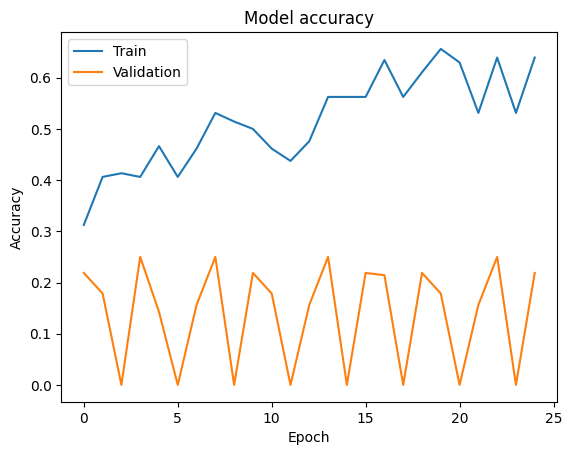

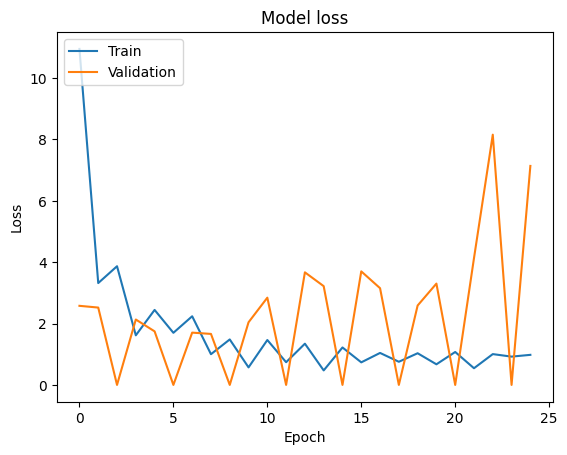

In [ ]:


import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


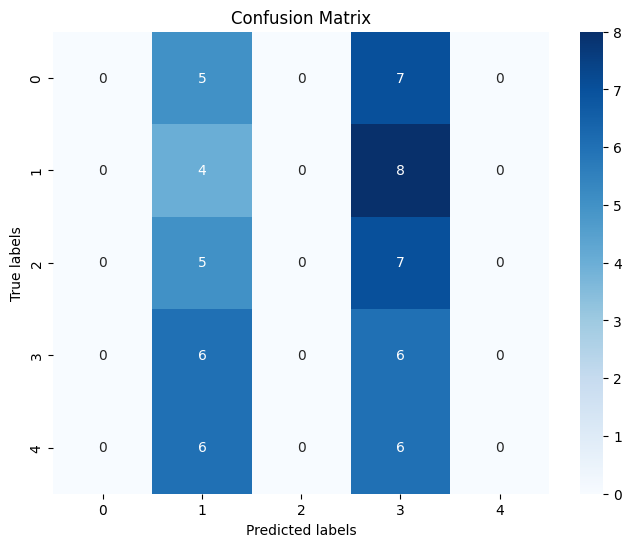

In [ ]:


from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes for the test set
y_pred = np.argmax(model.predict(validation_generator), axis=-1)

# Get true classes for the test set
y_true = validation_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import os 
import cv2
#Read and preprocess your image
img = cv2.imread('"D:\dataset for lab programs\archive\animals\5 classes of animals\dog\0df912089d.jpg"')  
img = cv2.resize(img, (64, 64))

# Display the image
cv2.imshow('Image', img)


img = np.expand_dims(img, axis=0)  
img = img / 255.0  # Normalize the image

preds = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(preds)

# Mapping predicted index to class label
class_indices = train_generator.class_indices
predicted_class_label = list(class_indices.keys())[predicted_class_index]

print("Predicted class:", predicted_class_label)

